In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Model, Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2
from keras.callbacks import LambdaCallback

/home/akash/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [13]:
sns.set_style('darkgrid')

### Settings

In [5]:
# number of samples in the data set
N_SAMPLES = 2000
# ratio between training and test sets
TEST_SIZE = 0.2
# boundary of the graph
GRID_PADDING = 0.5
GRID_STEP = 0.01
# number of iterations of the neural network
N_EPOCHS = 200
# index of the layer we want to visualize
LAYER_INDEX = 2

### Create artificial dataset

In [4]:
X, y = make_moons(n_samples = N_SAMPLES, noise = 0.4, shuffle = True, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 21)

In [6]:
xmin, xmax = X[:, 0].min() - GRID_PADDING, X[:, 0].max() + GRID_PADDING 
ymin, ymax = X[:, 1].min() - GRID_PADDING, X[:, 1].max() + GRID_PADDING 
XX, YY = np.meshgrid(np.arange(xmin, xmax, GRID_STEP), np.arange(ymin, ymax, GRID_STEP))

### Auxillary plotting function

In [15]:
# function making the graph of the dataset
def make_plot(X, y, plot_name, XX = None, YY = None, preds = None):
    plt.figure(figsize = (10, 10))
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize = 20)
    
    if XX and YY and preds:
        plt.contourf(XX, YY, preds.reshape(XX), 25, cmap = cm.Spectral, alpha = 0.6)
        plt.contour(XX, YY, preds.reshape(XX), level = [0.5], cmap = 'Grey', vmin = 0, vmax = 0.6)
    
    plt.scatter(x = X[:, 0], y = X[:, 1], c = y.ravel(), cmap = plt.cm.Spectral, s = 40, edgecolors = 'black')

In [ ]:
# function creating weight matrix graph


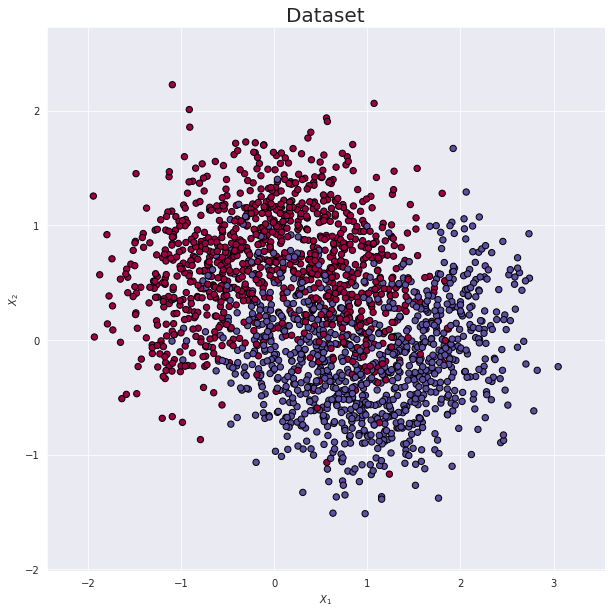

In [16]:
make_plot(X, y, 'Dataset')

### Neural network without regularisation (high variance)

In [7]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=2,activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)

In [8]:
y_train_pred_1 = model_1.predict_classes(X_train)
y_test_pred_1 = model_1.predict_classes(X_test)
train_acc = accuracy_score(y_train, y_train_pred_1)
test_acc = accuracy_score(y_test, y_test_pred_1)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.888125
Test accuracy: 0.8425
